# Simulation Analyser INFER

## Import relevant libraries

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import os
import quantstats as qs

## Get the data

In [2]:
config_file_name = "config_03a_mix_infer.ini"

### Simulation Results

In [3]:
file_import_sim_results = config_file_name.replace(".ini", ".csv")
fullpath_import_sim_results = os.path.join('../results', 'data', 'simul_results', 'sim_results_' + file_import_sim_results)

In [4]:
df_simulation_results = pd.read_csv(fullpath_import_sim_results)

In [5]:
fig = px.box(df_simulation_results, y="fmt_total_profit_percentage", color="model_type", points="all", color_discrete_sequence=[ "#FF7F0E", "#00CC96", "#10aded", "#8A56EF"],  width=800, height=600)
fig.show()

In [6]:
fig = px.histogram(df_simulation_results, x="fmt_total_profit_percentage", color="model_type", color_discrete_sequence=[ "#FF7F0E", "#00CC96", "#10aded", "#8A56EF"],  width=800, height=600, marginal="rug", # can be `box`, `violin`
                         hover_data=['total_reward_cash','fmt_total_profit_percentage', 'num_of_trades', 'sim_id'])
fig.show()

In [7]:
fig = px.histogram(df_simulation_results, x="num_of_trades", color="model_type", color_discrete_sequence=[ "#FF7F0E", "#00CC96", "#10aded", "#8A56EF"],  width=800, height=600, marginal="rug", # can be `box`, `violin`
                         hover_data=['total_reward_cash','fmt_total_profit_percentage', 'num_of_trades', 'sim_id'])
fig.show()

### Robot Actions & Env data

In [8]:
sim_id = 265

In [9]:
file_import_robot_actions_and_env = config_file_name.replace(".ini", "")
fullpath_import_robot_actions_and_env = os.path.join('../results', 'data', 'robot_actions_and_env', 'robot_actions_and_env_results_' + file_import_robot_actions_and_env + '_sim_id_' + str(sim_id) + ".csv")

In [10]:
df_robot_actions_and_env = pd.read_csv(fullpath_import_robot_actions_and_env)

In [11]:
fig = px.line(df_robot_actions_and_env, x="dates", y="prices", color_discrete_sequence=['#969696'])
fig.add_trace(go.Scatter(name='Long', x=df_robot_actions_and_env[df_robot_actions_and_env['actions'] == 1]['dates'], y=df_robot_actions_and_env[df_robot_actions_and_env['actions'] == 1]['prices'], mode='markers', marker_symbol='circle', marker_size=10, marker_color='#228b22'))
fig.add_trace(go.Scatter(name='Short', x=df_robot_actions_and_env[df_robot_actions_and_env['actions'] == 0]['dates'], y=df_robot_actions_and_env[df_robot_actions_and_env['actions'] == 0]['prices'], mode='markers', marker_symbol='circle', marker_size=10, marker_color='#c83232'))

fig.show()

                           Strategy
-------------------------  ----------
Start Period               2022-10-02
End Period                 2022-12-30
Risk-Free Rate             0.0%
Time in Market             32.0%

Cumulative Return          14.11%
CAGR﹪                     71.84%

Sharpe                     1.04
Prob. Sharpe Ratio         77.91%
Smart Sharpe               1.02
Sortino                    3.11
Smart Sortino              3.07
Sortino/√2                 2.2
Smart Sortino/√2           2.17
Omega                      1.59

Max Drawdown               -11.78%
Longest DD Days            36
Volatility (ann.)          43.92%
Calmar                     6.1
Skew                       6.26
Kurtosis                   50.4

Expected Daily %           0.15%
Expected Monthly %         4.5%
Expected Yearly %          14.11%
Kelly Criterion            15.86%
Risk of Ruin               0.0%
Daily Value-at-Risk        -4.37%
Expected Shortfall (cVaR)  -4.37%

Max Consecutive Wins       2


None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-11-26,2022-12-14,2022-12-30,34,-11.775625,-11.634414
2,2022-10-14,2022-10-28,2022-11-19,36,-9.250723,-6.949876


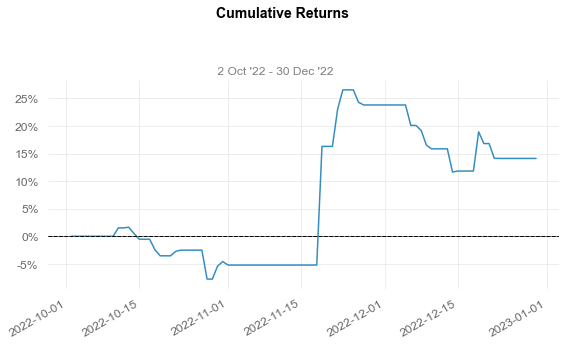

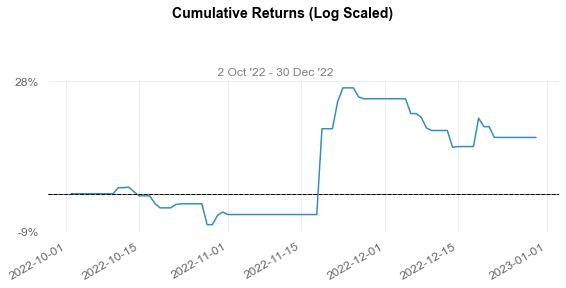

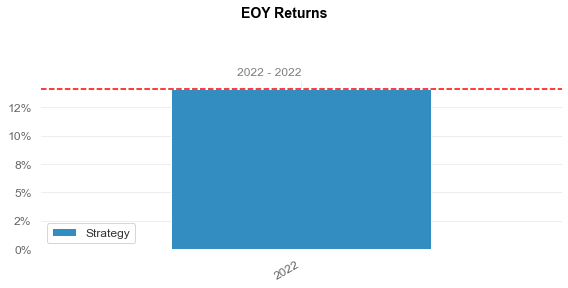

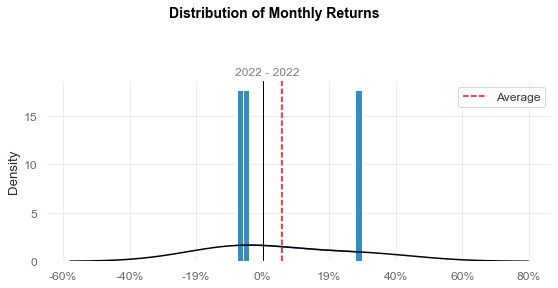

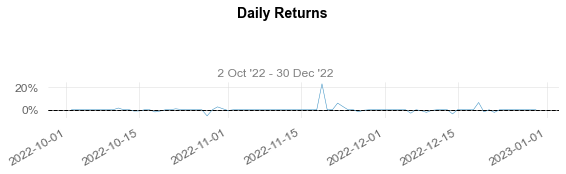

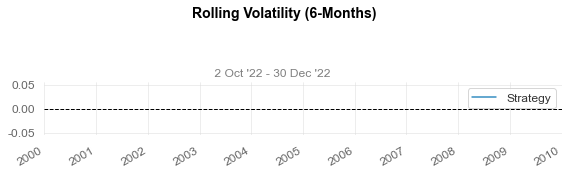

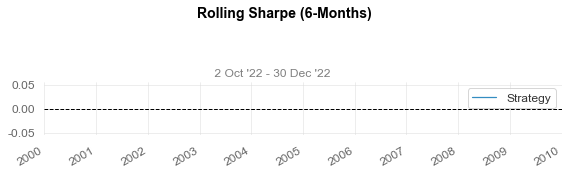

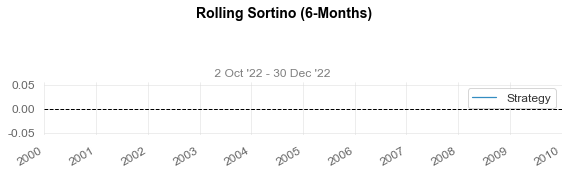

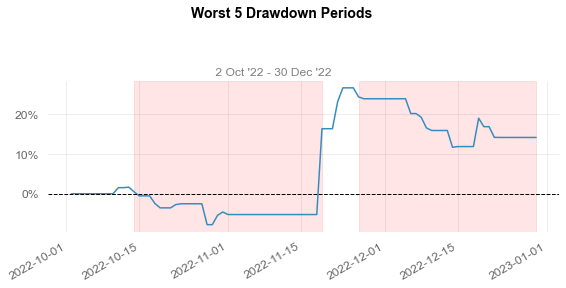

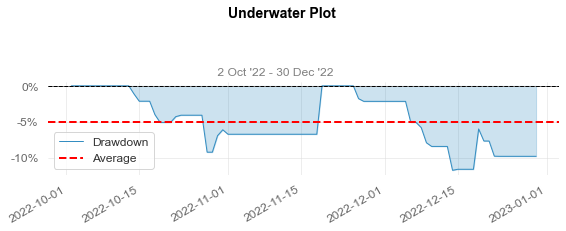

/opt/homebrew/Caskroom/miniforge/base/envs/msc_uol_ai_dissertation/lib/python3.8/site-packages/quantstats/stats.py:968: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



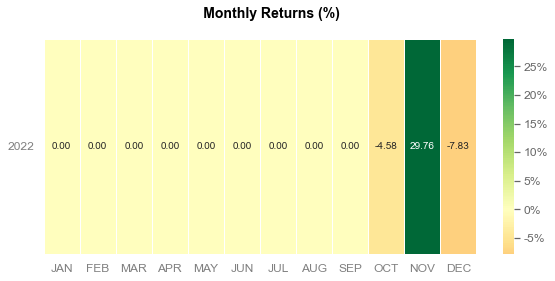

/opt/homebrew/Caskroom/miniforge/base/envs/msc_uol_ai_dissertation/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



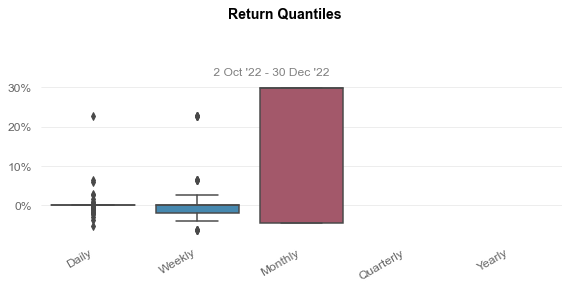

In [12]:
qs.extend_pandas()

df_temp = df_robot_actions_and_env.copy()
df_temp['Date'] = pd.to_datetime(df_temp['dates'])
df_temp.set_index('Date', inplace=True)

net_worth = pd.Series(df_temp['total_profit_percentage'], index=df_temp.index[6:])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)